In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_men = pd.read_csv('data/men_w_IBM_200.csv')
df_women = pd.read_csv('data/women_w_IBM_200.csv')

In [9]:
df_men = df_men.fillna(0)

In [10]:
df_men

,Unnamed: 0,politician_name,politician_username,gender,party,tweet_text,tweet_retweet_count,tweet_favorite_count,Joy,IBM_text,Analytical,Sadness,Confident,Tentative,Fear,Anger
0,0,Mark Udall,MarkUdall,M,D,It has been the greatest privilege of my life ...,42,111,0.917048,It has been the greatest privilege of my life ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,Mark Udall,MarkUdall,M,D,Americans finally know the truth about this da...,99,82,0.000000,Americans finally know the truth about this da...,0.503988,0.000000,0.000000,0.000000,0.000000,0.0
2,2,Mark Udall,MarkUdall,M,D,TUNE IN: @MarkUdall to speak about Senate Inte...,35,22,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,Mark Udall,MarkUdall,M,D,Releasing torture report affirms our values as...,40,29,0.000000,Releasing torture report affirms our values as...,0.000000,0.568586,0.000000,0.000000,0.000000,0.0
4,4,Mark Udall,MarkUdall,M,D,Heading to Senate floor now to discuss the Sen...,25,24,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,5,Mark Udall,MarkUdall,M,D,Sen-- Intel Cmte study corrects record on #CIA...,41,38,0.000000,Sen-- Intel Cmte study corrects record on #CIA...,0.000000,0.000000,0.560944,0.000000,0.000000,0.0
6,6,Mark Udall,MarkUdall,M,D,Thank you to all who came out to show support ...,6,14,0.000000,Thank you to all who came out to show support ...,0.793846,0.000000,0.660207,0.000000,0.000000,0.0
7,7,Mark Udall,MarkUdall,M,D,On my way to #Salida for community meeting on ...,18,14,0.683726,On my way to #Salida for community meeting on ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,8,Mark Udall,MarkUdall,M,D,"Join me, @Interior &amp; @forestservice at 1 p...",3,10,0.542233,"Join me, @Interior &amp; @forestservice at 1 p...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,9,Mark Udall,MarkUdall,M,D,"On 81st anniv of #prohibition's end, here are ...",6,10,0.844052,"On 81st anniv of #prohibition's end, here are ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
df_women

,Unnamed: 0,politician_name,politician_username,gender,party,tweet_text,tweet_retweet_count,tweet_favorite_count,Analytical,IBM_text,Joy,Confident,Fear,Sadness,Tentative
0,0,Sen. Lisa Murkowski,lisamurkowski,W,D,"Alongside my colleague Senator Tom Udall, I in...",19,66,0.506763,"Alongside my colleague Senator Tom Udall, I in...",NaN,NaN,NaN,NaN,NaN
1,1,Sen. Lisa Murkowski,lisamurkowski,W,D,To help Alaskans navigate the extensive conten...,7,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sen. Lisa Murkowski,lisamurkowski,W,D,The Military Healing Arts Program is a partner...,9,29,NaN,The Military Healing Arts Program is a partner...,0.685390,NaN,NaN,NaN,NaN
3,3,Sen. Lisa Murkowski,lisamurkowski,W,D,For states like Alaska that have legalized mar...,26,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sen. Lisa Murkowski,lisamurkowski,W,D,Recently joined colleagues in a letter to the ...,22,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Sen. Lisa Murkowski,lisamurkowski,W,D,--@SenFeinstein &amp; I led a bipartisan group...,16,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Sen. Lisa Murkowski,lisamurkowski,W,D,Anchorage celebrated the opening of its first ...,12,59,0.506763,Anchorage celebrated the opening of its first ...,0.589545,NaN,NaN,NaN,NaN
7,7,Sen. Lisa Murkowski,lisamurkowski,W,D,"Communities across Alaska gathered together, r...",23,65,0.747994,"Communities across Alaska gathered together, r...",0.529409,NaN,NaN,NaN,NaN
8,8,Sen. Lisa Murkowski,lisamurkowski,W,D,Village built clinics play a vital role when i...,9,38,NaN,Village built clinics play a vital role when i...,0.734501,NaN,NaN,NaN,NaN
9,9,Sen. Lisa Murkowski,lisamurkowski,W,D,"The Interior, Environment, &amp; Related Agenc...",9,11,0.532616,"The Interior, Environment, &amp; Related Agenc...",NaN,NaN,NaN,NaN,NaN


In [7]:
np.mean(df_men.loc[:, 'Confident'])

0.697421

In [8]:
np.mean(df_women.loc[:, 'Confident'])

0.6254977647058824

In [9]:
np.mean(df_men.loc[100:150, 'Confident'])

0.767099

In [10]:
np.mean(df_women.loc[100:150, 'Confident'])

0.62161775

In [12]:
hist, bins = np.histogram(df_women.loc[:, 'Confident'], range=len(df_women))

TypeError: 'int' object is not iterable

In [22]:
conf_w = df_women.loc[:, 'Confident']
conf_m = df_men.loc[:, 'Confident']

(array([0., 0., 3., 4., 7., 1., 0., 0., 1.]),
 array([0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85]),
 <a list of 9 Patch objects>)

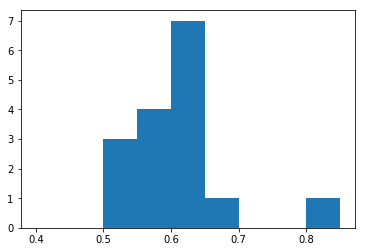

In [41]:
plt.hist(np.nan_to_num(conf_w), bins=np.arange(.4,.9,.05))

(array([0., 0., 2., 9., 6., 8., 2., 3., 3.]),
 array([0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85]),
 <a list of 9 Patch objects>)

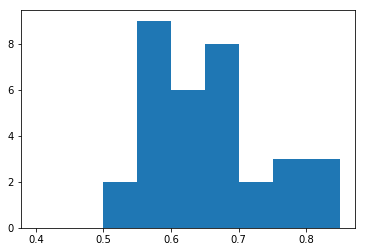

In [40]:
plt.hist(np.nan_to_num(conf_m), bins=np.arange(.4,.9,.05))